<a href="https://colab.research.google.com/github/erika-munho/TalentoTech/blob/main/Proyecto_Estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS Y PREDICCION DE CULTIVOS**



**Talento Tech - Análisis de Datos Integrador**

**Presentado por: Erika Muñoz Hormaza**


**Mayo de 2024**


URL del proyecto en repositorio:

URL Video: https://www.youtube.com/watch?v=pvfl8439DmI

Dataset tomado de https://www.kaggle.com/code/theeyeschico/crop-analysis-and-prediction/notebook


## **1. Planteamiento del problema**

Generalmente la planeación para establecer un cultivo se realiza sin tener en cuenta análisis previos del suelo y del clima, por parte de los agricultores, lo cual resulta en bajos niveles de rendimiento, presencia de plagas y enfermedades que afectan notablemente su desarrollo, de ahí la importancia de aprovechar las nuevas tecnologías que permitan identificar, analizar variables claves para el establecimiento de cultivos y a partir de allí realizar predicciones para determinar que tipo de producto es conveniente plantar.

## **2. Objetivo**
Realizar el análisis y la predicción de cultivos mediante un modelo que integra variables relacionadas con las características del suelo, como el pH y  macronutrientes como el nitrógeno, fósforo y potasio; así mismo factores climáticos como la temperatura, humedad y precipitaciones. El propósito es recomendar los cultivos más adecuados para establecer en una granja o finca.


##**3. Variables del dataset**

## 3.1 Variables Numericas:

Nitrogeno (N)- relación del contenido de nitrógeno en el suelo, expresado en ppm = mg/Kg

Fosforo (P) - relación del contenido de fósforo en el suelo, expresado en ppm = mg/Kg

Potasio (K) - relación del contenido de potasio en el suelo, expresado en ppm = mg/Kg

Temperatura - temperatura en grados Celsius

Humedad - humedad relativa en %

ph - valor del ph del suelo, determina el grado de acidez y alcalindadd, valores proximos a 7.0 expresan la neutralidad del suelo. Expresado en unidades de pH

Precipitación - precipitación en mm, es importante aclarara que un litro de agua por metro cuadrado es igual a un milímetro de lluvia.


## 3.2 Variables Nominales:

Label- identifica el nombre de los cultivos incluidos en el dataset

## **4. Importacion de librerias**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **5. Importacion de los datos**



In [ ]:
df = pd.read_csv("Cultivos.csv")
df.head()

nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  
0  202.935536  rice  
1  226.655537  rice  
2  263.964248  rice  
3  242.864034  rice  
4  262.717340  rice

In [ ]:
# Para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar todas las filas y columnas del conjunto de datos
print(df)

      nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
5           69          37         42    23.058049  83.370118  7.073454   
6           69          55         38    22.708838  82.639414  5.700806   
7           94          53         40    20.277744  82.894086  5.718627   
8           89          54         38    24.515881  83.535216  6.685346   
9           68          58         38    23.223974  83.033227  6.336254   
10          91          53         40    26.527235  81.417538  5.386168   
11          90          46         42    23.978982  81.450616  7.502834   
12          78          5

In [ ]:
df

nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
5           69          37         42    23.058049  83.370118  7.073454   
6           69          55         38    22.708838  82.639414  5.700806   
7           94          53         40    20.277744  82.894086  5.718627   
8           89          54         38    24.515881  83.535216  6.685346   
9           68          58         38    23.223974  83.033227  6.336254   
10          91          53         40    26.527235  81.417538  5.386168   
11          90          46         42    23.978982  81.450616  7.502834   
12          78          58         44    26.800796  80.886848  5.108682   
13          93          56         36    24.014976  82.056872  6.984354   
14          94          50         37    25.665852  80.663850  6.948020   
15          60          48         39    24.282094  80.300256  7.042299   
16          85          38         41    21.587118  82.788371  6.249051   
17          91          35         39    23.793920  80.418180  6.970860   
18          77          38         36    21.865252  80.192301  5.953933   
19          88          35         40    23.579436  83.587603  5.853932   
20          89          45         36    21.325042  80.474764  6.442475   
21          76          40         43    25.157455  83.117135  5.070176   
22          67          59         41    21.947667  80.973842  6.012633   
23          83          41         43    21.052536  82.678395  6.254028   
24          98          47         37    23.483813  81.332651  7.375483   
25          66          53         41    25.075635  80.523891  7.778915   
26          97          59         43    26.359272  84.044036  6.286500   
27          97          50         41    24.529227  80.544986  7.070960   
28          60          49         44    20.775761  84.497744  6.244841   
29          84          51         35    22.301574  80.644165  6.043305   
30          73          57         41    21.446540  84.943760  5.824709   
31          92          35         40    22.179319  80.331272  6.357389   
32          85          37         39    24.527837  82.736856  6.364135   
33          98          53         38    20.267076  81.638952  5.014507   
34          88          54         44    25.735429  83.882662  6.149411   
35          95          55         42    26.795339  82.148087  5.950661   
36          99          57         35    26.757542  81.177340  5.960370   
37          95          39         36    23.863305  83.152508  5.561399   
38          60          43         44    21.019447  82.952217  7.416245   
39          63          44         41    24.172988  83.728757  5.583370   
40          62          42         36    22.781338  82.067191  6.430010   
41          64          45         43    25.629801  83.528423  5.534878   
42          83          60         36    25.597049  80.145093  6.903986   
43          82          40         40    23.830675  84.813601  6.271479   
44          85          52         45    26.313555  82.366990  7.224286   
45          91          35         38    24.897282  80.525861  6.134287   
46          76          49         42    24.958779  84.479634  5.206373   
47          74          39         38    23.241135  84.592018  7.782051   
48          79          43         39    21.666283  80.709606  7.062779   
49          88          55         45    24.635449  80.413630  7.730368   
50          60          36         43    23.431219  83.063101  5.286204   
51          76          60         39    20.045414  80.347756  6.766240   
52          93          56     

## **6. Limpieza de datos**

In [ ]:
# Numero de filas y columnas
print('Numero de filas:',df.shape[0])
print('Numero de columnas:',df.shape[1])

Numero de filas: 2200
Numero de columnas: 8


In [ ]:
# Valores perdidos
df.isnull().sum()

nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
# Valores duplicados
n_dup = len(df) - len(df.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 0


In [ ]:
# Valores unicos
df.nunique()

nitrogen        137
phosphorus      117
potassium        73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [ ]:
# Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# Eliminar la columna categórica 'C' del DataFrame
df_n = df.drop(columns=['label'])

df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


## **7. Analisis Exploratorio**

## 7.1 Medidas de tendencia central y dispersion

In [ ]:
df.describe()

nitrogen   phosphorus    potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

Como parte del proceso de limpieza de datos, es importante identificar si en el dataset existen columnas irrelevantes, para lo cual se debe analizar el dato referente a la desviación estandar, cuado el valor de ésta medida es igual a cero se debe descarta la columna para el análsis, ya que indica que no hay variabilidad en los datos porque todos los valores son iguales. Para el caso de este proyecto no se debe descartar ninguna.

## 7.2 Distribucion de datos categoricos

In [ ]:
# Descripcion estadistic de variables categoricas
df.describe(include=['object'])

label
count   2200
unique    22
top     rice
freq     100

In [ ]:
# Calcular la frecuencia de cada categoría
frecuencia_categoria = df['label'].value_counts()

# Calcular la proporción de cada categoría
proporcion_categoria = frecuencia_categoria / len(df)

# Crear un DataFrame para mostrar las estadísticas categóricas
estadisticas_categoricas = pd.DataFrame({
    'Frecuencia': frecuencia_categoria,
    'Proporción': proporcion_categoria
})

# Mostrar las estadísticas categóricas
print("Estadísticas categóricas:")
print(estadisticas_categoricas)

# Cantindad de subniveles para variables categorica
categories =  ['label']
for column in categories:
  print(f'La columna {column}: tiene {df[column].nunique()} subniveles')

Estadísticas categóricas:
             Frecuencia  Proporción
label                              
rice                100    0.045455
maize               100    0.045455
jute                100    0.045455
cotton              100    0.045455
coconut             100    0.045455
papaya              100    0.045455
orange              100    0.045455
apple               100    0.045455
muskmelon           100    0.045455
watermelon          100    0.045455
grapes              100    0.045455
mango               100    0.045455
banana              100    0.045455
pomegranate         100    0.045455
lentil              100    0.045455
blackgram           100    0.045455
mungbean            100    0.045455
mothbeans           100    0.045455
pigeonpeas          100    0.045455
kidneybeans         100    0.045455
chickpea            100    0.045455
coffee              100    0.045455
La columna label: tiene 22 subniveles


# 7.3 Visulizacion de datos

## 7.3.1 Histogramas

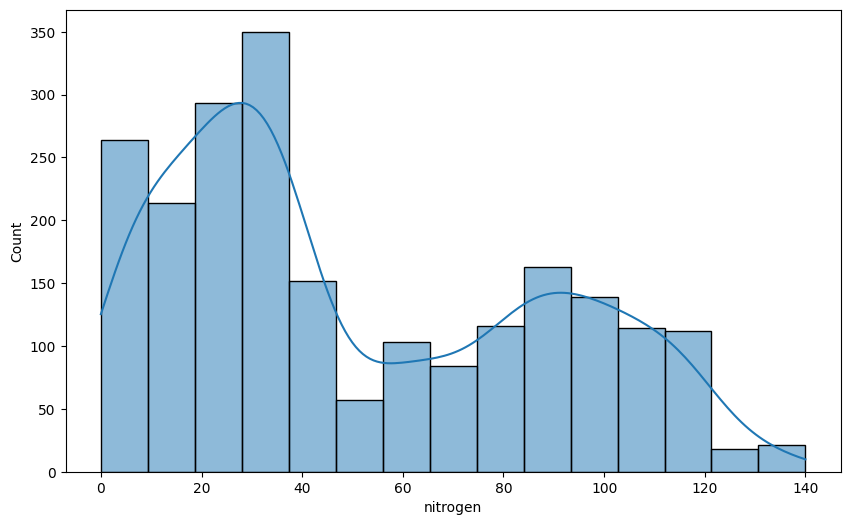

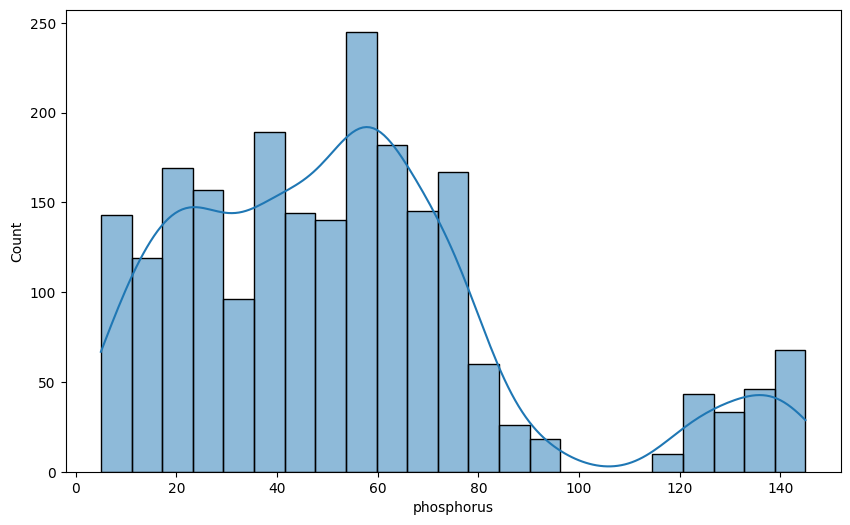

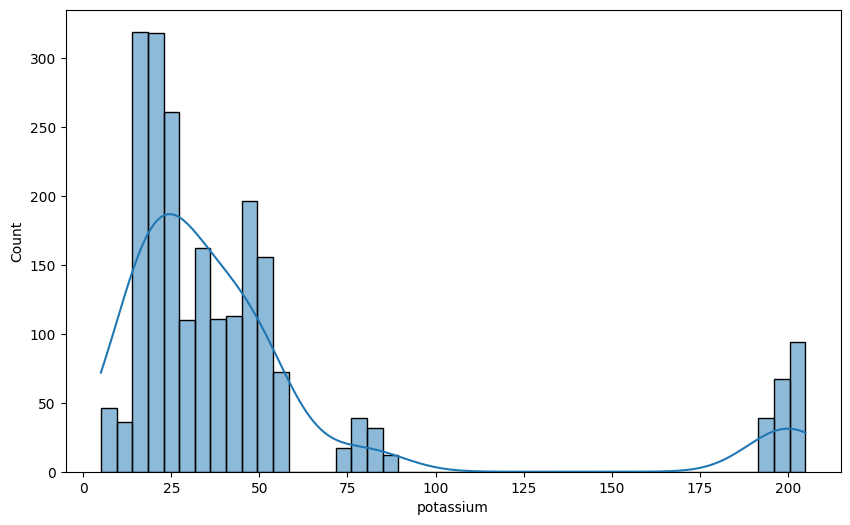

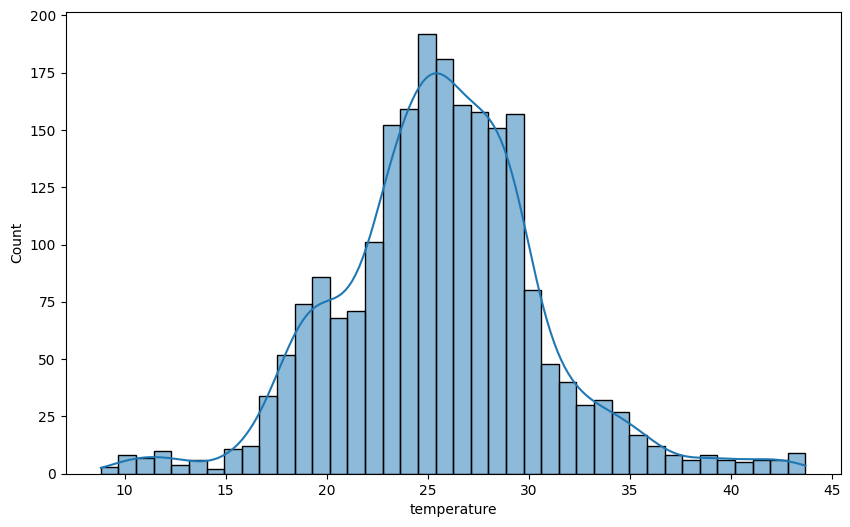

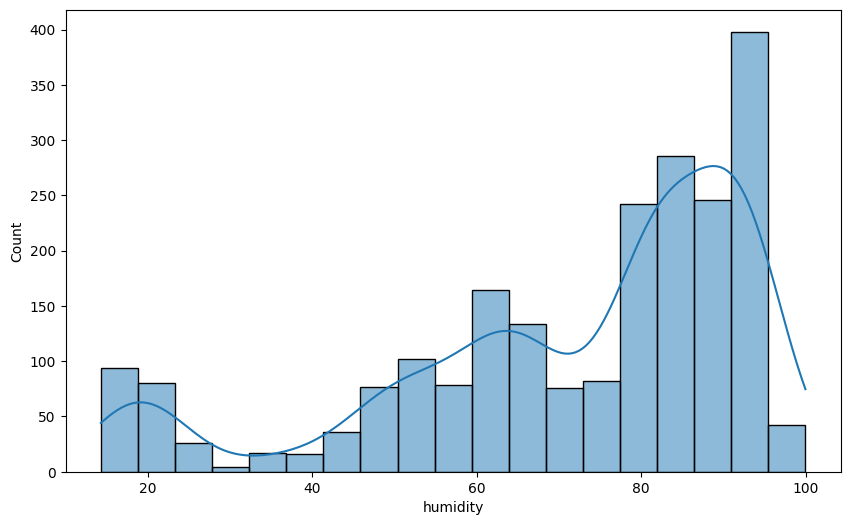

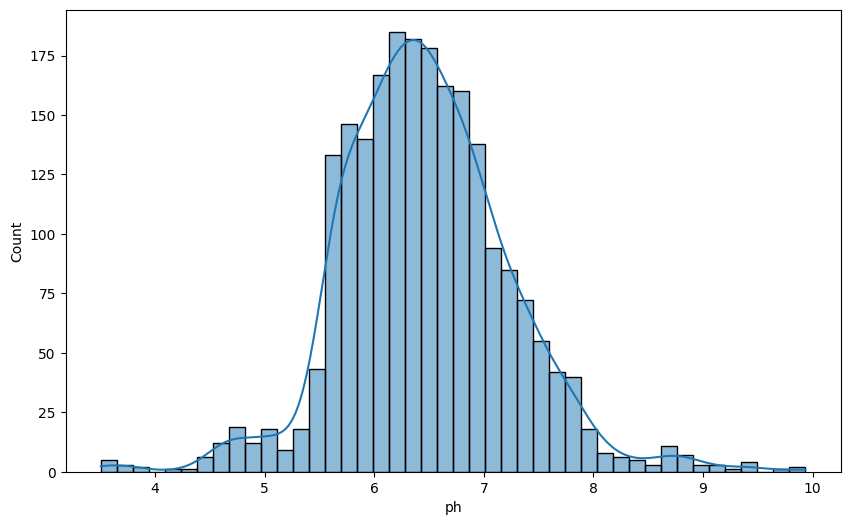

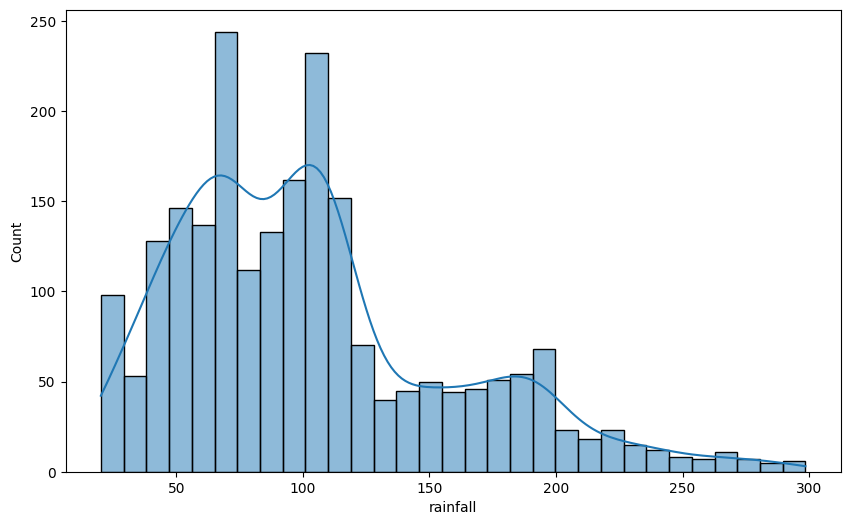

In [ ]:
# Definir el tamano
std_figure_size = (10, 6)

for col in df_n.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data=df_n, x=col, kde=True, ax=axs)
    plt.show()

## Analisis de los histogramas

- Nitrogeno (N): se observan dos picos notables en el histograma: el primero al rededor del valor 30 ppm y el segundo cerca del valor 110.

- Fosforo (P): La gráfica muestra  que los valores de este macronutriente varían aproximadamente entre 0 y 140.
Los datos tienden a presentar mayor agrupamiento entre los valores 5 y 75, presentandose un un pico prominente en la frecuencia alrededor del valor 60. Esto sugiere que hay una concentración significativa de observaciones en ese rango. La discontinuidad de los datos obedece a que los valores comprendidos entre 95 y 110 ppm se observan cantidadades minimas

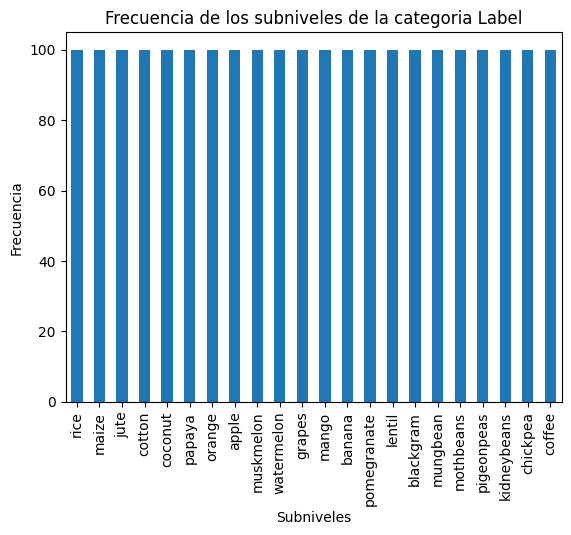

In [ ]:
# Create the variable conteo_valores
conteo_valores = df['label'].value_counts()

# Gráfico de barras para visualizar los nombres de los subniveles y sus frecuencias
conteo_valores.plot(kind='bar')
plt.title('Frecuencia de los subniveles de la categoria Label')
plt.xlabel('Subniveles')
plt.ylabel('Frecuencia')
plt.show()

## 7.3.2 Diagramas de caja

Para tener una mejor aproximacion a la distribucion y agrupamiento de los datos, se muestra a continuacion los diagramas de caja para cada una de las variables

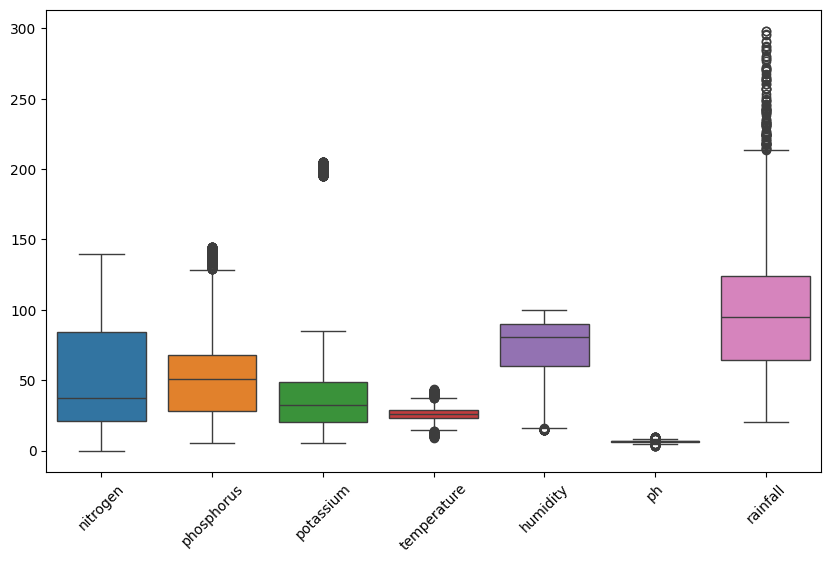

In [ ]:
# Diagrama de caja para cada columna numérica en el DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_n)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.show()

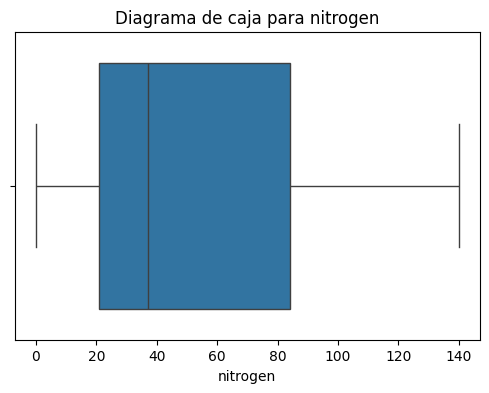

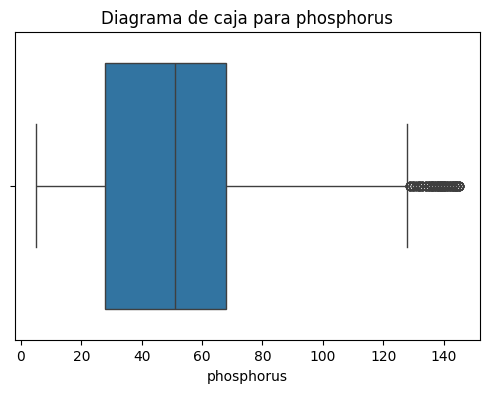

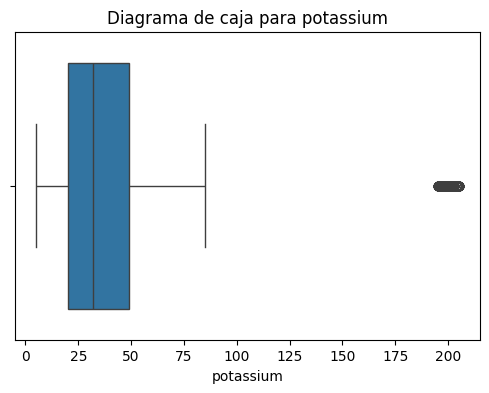

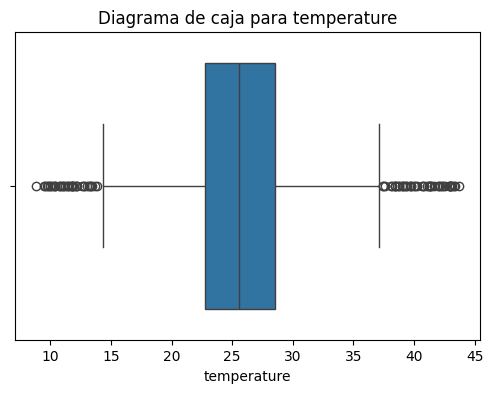

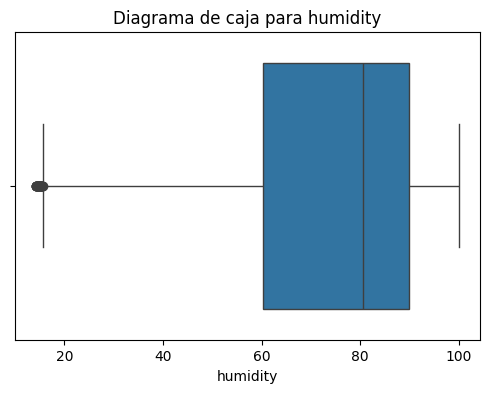

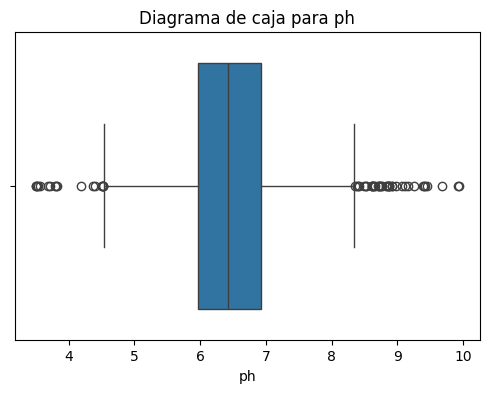

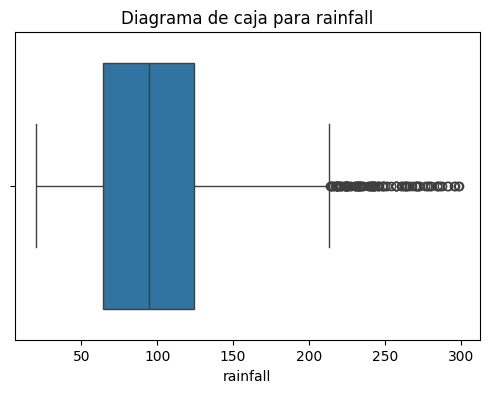

In [ ]:
# Obtener una lista de todas las columnas del DataFrame
columnas = df_n.columns

# Iterar sobre cada columna y crear un diagrama de caja independiente
for columna in columnas:
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    sns.boxplot(x=df_n[columna])  # Crear el diagrama de caja
    plt.title(f'Diagrama de caja para {columna}')  # Título del gráfico
    plt.xlabel(columna)  # Etiqueta del eje x
    #plt.ylabel('Valor')  # Etiqueta del eje y
    plt.show()  # Mostrar el gráfico

## 7.3.3  Diagramas de caja por variable para cada culivo

Los graficos que se presentan a continuacion permiten visualizar la distrbucion de los datos para cada una de las variables discriminadas por cultivos

## A) pH - Potencial de hidrogeno
Se define como el logaritmo negativo de la concentración de iones hidrógeno en el suelo y su escala de medición va de 0 a 14, considerando al 7 como el valor de neutralidad, propicio para los cultivos, sin embargo algunos como se observa en la grafica son mas tolerantes a cirtos niveles de acidez y alcalinidad

<Axes: xlabel='ph', ylabel='label'>

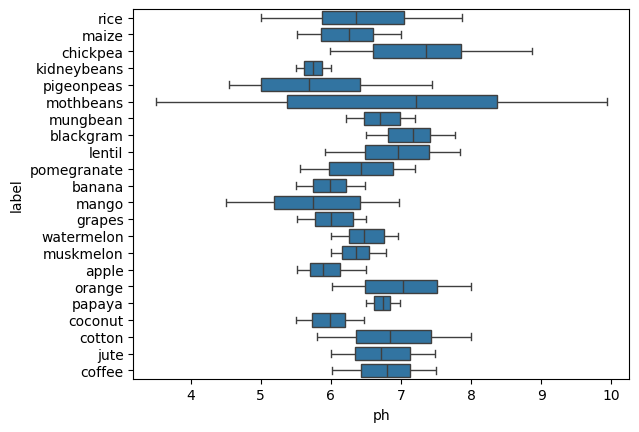

In [ ]:
sns.boxplot(y='label',x='ph',data=df)

## B) Precipitaciones

Relacionada con la necesidad hidrica de cultivo, debido a la necesidad natural que tienen las plantas de este recurso para poder realizar el proceso de fotosíntesis, por medio del cual crean su alimento.

A continuacion se presenta la cantidad de lluvia en milimetros requerida para cada cultivo

<Axes: xlabel='rainfall', ylabel='label'>

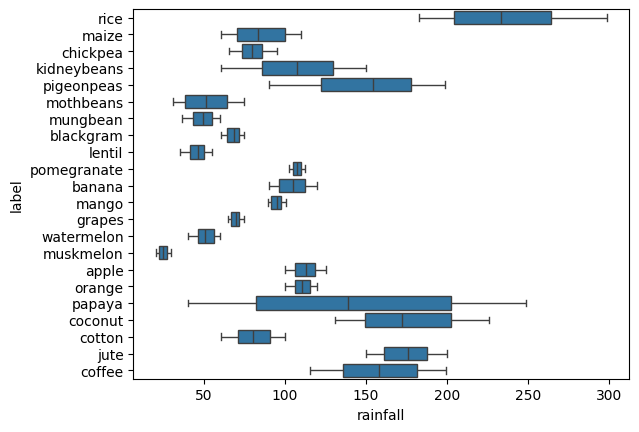

In [ ]:
sns.boxplot(y='label',x='rainfall',data=df)

## C) Niveles de Macroelementos del suelo: Nitrogeno, Fosforo y Potasio

Los tres integran el grupo de los elementos escenciales para el desarrollo de la mayoria de cultivo agricolas debido a su contribucion para que la planta pueda realizar con mayor eficiencia sus funciones vitales.

Es asi como el Nitrogeno contribuye al crecimiento de las raices y desarrollo foliar. El Fosforo es esencial para el crecimiento de las plantas, vital para sus procesos de transferencia de energía como floracion y formacion de frutos. El Potasio es clave para crecimiento de raices, fotositesis y transpiracion, a continuacion se muestra los requerimientos de estos nutrientes para cada cultivo.

<Axes: xlabel='nitrogen', ylabel='label'>

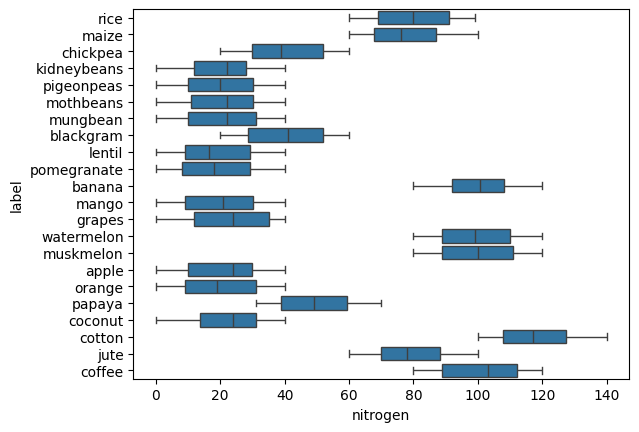

In [ ]:
# Requerimiento de Nitrogeno
sns.boxplot(y='label',x='nitrogen',data=df)

<Axes: xlabel='phosphorus', ylabel='label'>

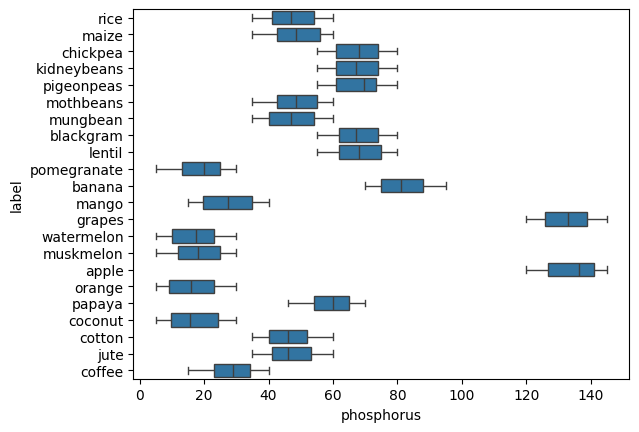

In [ ]:
# Requerimiento de Fosforo
sns.boxplot(y='label',x='phosphorus',data=df)

<Axes: xlabel='potassium', ylabel='label'>

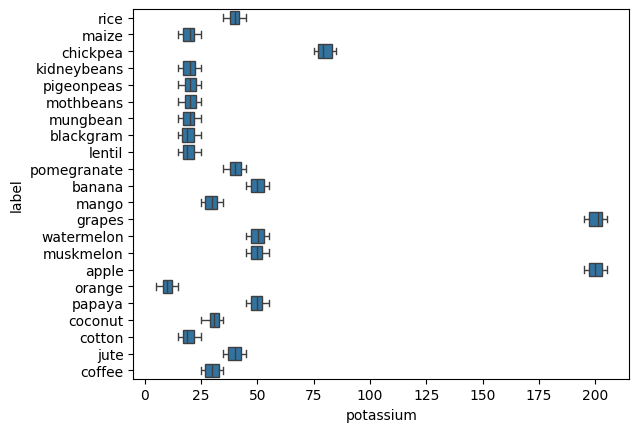

In [ ]:
# Requerimiento de Potasio
sns.boxplot(y='label',x='potassium',data=df)

## D) Visualizacion de cultivos segun requerimientos de fosforo para determinadas condiciones de precipitacion

Los niveles de Fosforo se pueden diferenciar notablemente para los diferentes cultivos cuando llueve poco, por debajo de los 50 mm o si llueve por ejemplo por encima de 150 mm, como se muestra a continuacion

<Axes: xlabel='phosphorus', ylabel='label'>

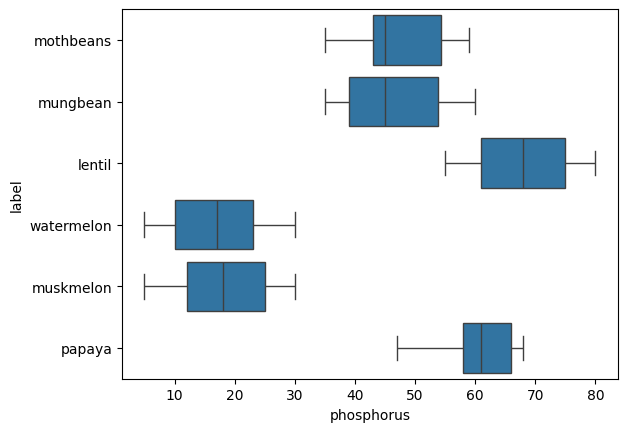

In [ ]:
sns.boxplot(y='label',x='phosphorus',data=df[df['rainfall']<50])

<Axes: xlabel='phosphorus', ylabel='label'>

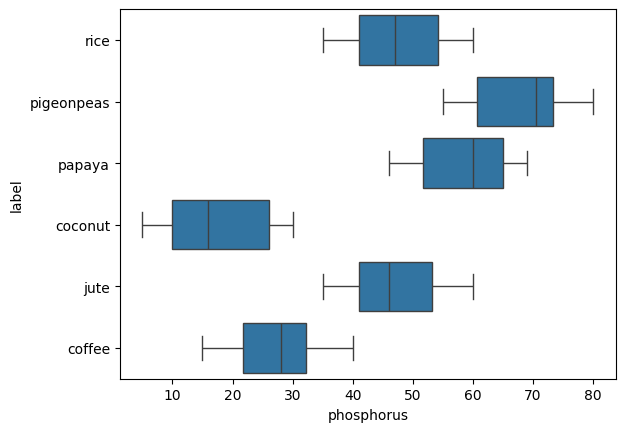

In [ ]:
sns.boxplot(y='label',x='phosphorus',data=df[df['rainfall']>150])

<Axes: xlabel='phosphorus', ylabel='label'>

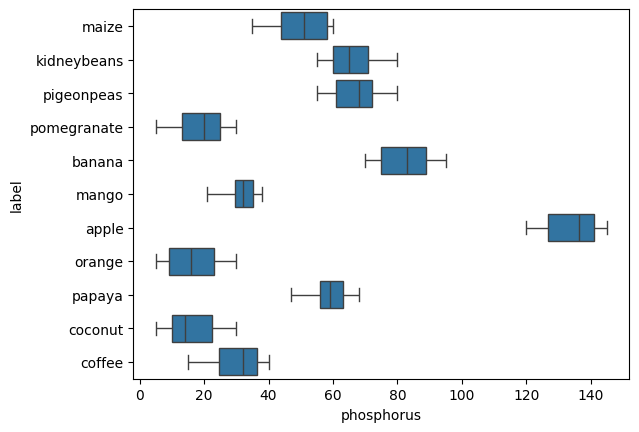

In [ ]:
sns.boxplot(y='label',x='phosphorus',data=df[(df['rainfall']<150) & (df['rainfall']>100)])
#sns.boxplot(y='label',x='phosphorus',data=df[(df['rainfall'] < 150) & (df['rainfall'] > 100)])

## E) Cultivos de acuerdo a humedad y precipitaciones para temperatura menor a 30 grados

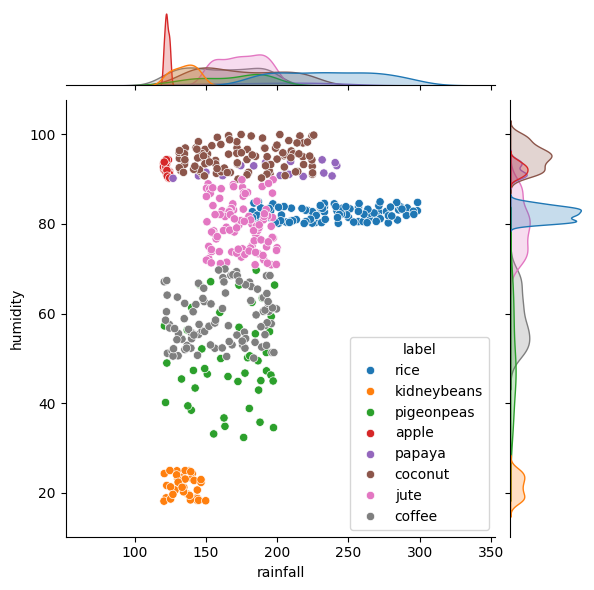

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

## 7.3.4 Matriz de correlacion

Con el proposito de identificar si se existe alguna relacion lineal entre las variables del dataset, en este caso entre  macroelementos del suelo y factores ambientales como pH, temperatura, humedad y precipitaciones, se realiza el analsis de la matriz de correlacion, que puede ser util para identificar posibles patrones o influencias en el crecimiento de los cultivos.

In [ ]:
# Obtener una lista de todas las columnas del DataFrame
columnas = df_n.columns

# Compute the correlation matrix for the selected columns
correlation_matrix = df_n[columnas].corr()

print(correlation_matrix)

             nitrogen  phosphorus  potassium  temperature  humidity        ph  \
nitrogen     1.000000   -0.231460  -0.140512     0.026504  0.190688  0.096683   
phosphorus  -0.231460    1.000000   0.736232    -0.127541 -0.118734 -0.138019   
potassium   -0.140512    0.736232   1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504   -0.127541  -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688   -0.118734   0.190859     0.205320  1.000000 -0.008483   
ph           0.096683   -0.138019  -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020   -0.063839  -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
nitrogen     0.059020  
phosphorus  -0.063839  
potassium   -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


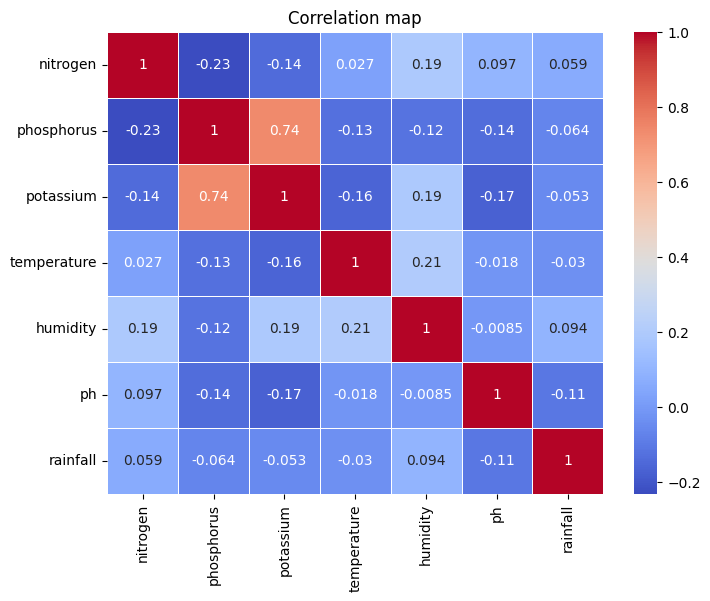

In [ ]:
#Visualizar la matriz con mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation map')
plt.show()

## Conclusion:

Por los resultados presentados en la matriz, donde la mayoria de los coeficientes de corrlacion son cercanos a cero se evidencia un correlacion muy debil entre las variables a excepcion de la correlacion entre el Potasio y el Fosforo, cuyo coeficiente es 0.74 lo que explica una relacion positiva entre ambos macroelementos relativamente fuerte, es decir que incrementos en cualquiera de los dos elementos genera un incremento en el otro o viceversa.

Lo anterior evidencia un comportamiento similar para estas dos variables por lo tanto para garantizar la confiabilidad de los analisis posteriores es necesario prescindir de una de ellas y de acuerdo a los requerimientos de estos macronutrientes en los cultivos observados a traves de los graficos de cajas, es notable la preponderancia del Fosforo sobre el Potasio, por tanto se continuara el analisis de regresion y clasificacion prescindiendo del segungo macroelemento.

## 8. Estandarización de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas a estandarizar
columnas_numericas = ['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']
columna_objeto = 'label'

# Crear un nuevo DataFrame con las columnas numéricas seleccionadas
df_numericas = df[columnas_numericas]

# Conservar la columna objeto
columna_objeto_serie = df[columna_objeto]

# Eliminar la columna objeto temporalmente
df = df.drop(columna_objeto, axis=1)

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Estandarizar los datos numéricos
df_st = scaler.fit_transform(df_numericas)

# Crear un nuevo DataFrame a partir de los datos estandarizados
df_st = pd.DataFrame(df_st, columns=columnas_numericas)

# Agregar nuevamente la columna objeto al DataFrame estandarizado
df_st[columna_objeto] = columna_objeto_serie

# Ahora df_estandarizado contiene los datos estandarizados con la columna objeto conservada

In [ ]:
df_st

nitrogen  phosphorus  potassium  temperature  humidity        ph  \
0     1.068797   -0.344551  -0.101688    -0.935587  0.472666  0.043302   
1     0.933329    0.140616  -0.141185    -0.759646  0.397051  0.734873   
2     0.255986    0.049647  -0.081939    -0.515898  0.486954  1.771510   
3     0.635298   -0.556811  -0.160933     0.172807  0.389805  0.660308   
4     0.743673   -0.344551  -0.121436    -1.083647  0.454792  1.497868   
5     0.499830   -0.496165  -0.121436    -0.505313  0.534097  0.780568   
6     0.499830    0.049647  -0.200431    -0.574291  0.501270 -0.993425   
7     1.177172   -0.010999  -0.160933    -1.054498  0.512711 -0.970393   
8     1.041704    0.019324  -0.200431    -0.217352  0.541515  0.278983   
9     0.472736    0.140616  -0.200431    -0.472538  0.518962 -0.172180   
10    1.095891   -0.010999  -0.160933     0.179945  0.446375 -1.400059   
11    1.068797   -0.223259  -0.121436    -0.323403  0.447861  1.335494   
12    0.743673    0.140616  -0.081939     0.233981  0.422534 -1.758679   
13    1.150079    0.079970  -0.239928    -0.316294  0.475098  0.665416   
14    1.177172   -0.101968  -0.220179     0.009799  0.412515  0.618459   
15    0.255986   -0.162613  -0.180682    -0.263531  0.396180  0.740304   
16    0.933329   -0.465842  -0.141185    -0.795861  0.507962 -0.284880   
17    1.095891   -0.556811  -0.180682    -0.359958  0.401478  0.647977   
18    0.716579   -0.465842  -0.239928    -0.740922  0.391330 -0.666286   
19    1.014610   -0.556811  -0.160933    -0.402325  0.543868 -0.795526   
20    1.041704   -0.253582  -0.239928    -0.847629  0.404020 -0.034901   
21    0.689486   -0.405197  -0.101688    -0.090623  0.522732 -1.808443   
22    0.445642    0.170938  -0.141185    -0.724643  0.426442 -0.590424   
23    0.879141   -0.374874  -0.101688    -0.901456  0.503021 -0.278447   
24    1.285547   -0.192936  -0.220179    -0.421213  0.442562  1.170907   
25    0.418548   -0.010999  -0.141185    -0.106785  0.406227  1.692297   
26    1.258453    0.170938  -0.101688     0.146768  0.564374 -0.236481   
27    1.258453   -0.101968  -0.141185    -0.214715  0.407175  0.777345   
28    0.255986   -0.132291  -0.081939    -0.956126  0.584757 -0.290320   
29    0.906235   -0.071645  -0.259677    -0.654737  0.411631 -0.550783   
30    0.608204    0.110293  -0.141185    -0.823629  0.604795 -0.833294   
31    1.122985   -0.556811  -0.160933    -0.678886  0.397574 -0.144865   
32    0.933329   -0.496165  -0.180682    -0.214990  0.505647 -0.136147   
33    1.285547   -0.010999  -0.200431    -1.056605  0.456323 -1.880389   
34    1.014610    0.019324  -0.081939     0.023542  0.557124 -0.413654   
35    1.204266    0.049647  -0.121436     0.232903  0.479196 -0.670516   
36    1.312641    0.110293  -0.259677     0.225437  0.435584 -0.657967   
37    1.204266   -0.435519  -0.239928    -0.346253  0.524321 -1.173593   
38    0.255986   -0.314228  -0.081939    -0.907992  0.515323  1.223587   
39    0.337267   -0.283905  -0.141185    -0.285082  0.550210 -1.145197   
40    0.310174   -0.344551  -0.239928    -0.559971  0.475562 -0.051010   
41    0.364361   -0.253582  -0.101688     0.002678  0.541209 -1.207868   
42    0.879141    0.201261  -0.239928    -0.003791  0.389209  0.561550   
43    0.852048   -0.405197  -0.160933    -0.352698  0.598947 -0.255894   
44    0.933329   -0.041322  -0.062190     0.137738  0.489031  0.975501   
45    1.095891   -0.556811  -0.200431    -0.142014  0.406316 -0.433199   
46    0.689486   -0.132291  -0.121436    -0.129867  0.583944 -1.632424   
47    0.635298   -0.435519  -0.200431    -0.469148  0.588993  1.696351   
48    0.770767   -0.314228  -0.180682    -0.780224  0.414571  0.766772   
49    1.014610    0.049647  -0.062190    -0.193734  0.401274  1.629556   
50    0.255986   -0.526488  -0.101688    -0.431602  0.520304 -1.529252   
51    0.689486    0.201261  -0.180682    -1.100390  0.398314  0.383529   
52    1.150079    0.079970  -0.121436    -0.347451  0.482684  1.180315   
53    0.39

## 8.1 Diagrama de cajas y violin con datos estandarizados

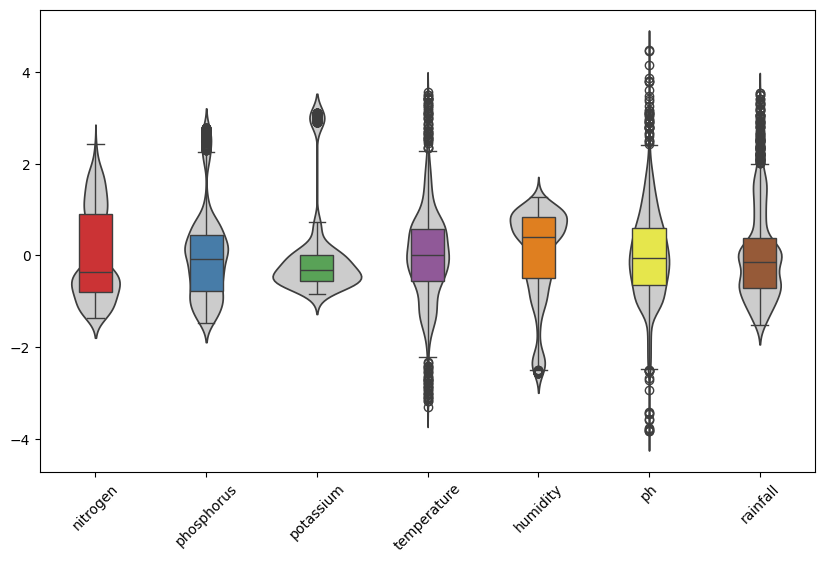

In [ ]:
# Crear el gráfico de caja y violín superpuestos
plt.figure(figsize=(10, 6))

# Gráfico de violín
sns.violinplot(data=df_st, inner=None, color=".8")  # inner=None para evitar duplicar las cajas internas

# Gráfico de caja
sns.boxplot(data=df_st, whis=1.5, width=0.3, palette="Set1")

# Rotar etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Conclusion:
La grafica presenta la distribucion de los datos estandarizdos para todas las variables comparando graficas de violin y graficas de caja, se destaca el agrupamiento de datos en variables como el nitrogeno para el cual la mayoria de los datos se agrupan en rangos inferiores a cero donde se ubican la mediana de los datos y otra porcion importante de los mismos se localizan despues del tercer cuartil, para el caso de la humedad una porcion importante de los datos se ubican al rededor de la mediana, otra porcion importante de los datos se agrupan por debajo del primer cuartil de su grafica de caja.

Para el resto de variables la distribucion de los datos entre las dos graficas es muy similar.


## 9. Prepocesamiento de datos

Se preparan los datos para el entrenamiento de un modelo de aprendizaje automático. Para este procedimiento se tienen en cuenta los siguientes aspectos para garantizar una mejor prediccion del modelo:

- Se elimina la variable potasio porque de acuerdo a la matriz de correlacion presenta el mismo comportamiento del fosforo.
- Se convierten las etiquetas categóricas en códigos numéricos y se organiza las características y las etiquetas en las variables X e y, respectivamente, para su uso en el modelo.

In [ ]:
# Eliminar la columna Potasio del DataFrame
df_sp = df_st.drop(columns=['potassium'])
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   float64
 1   phosphorus   2200 non-null   float64
 2   temperature  2200 non-null   float64
 3   humidity     2200 non-null   float64
 4   ph           2200 non-null   float64
 5   rainfall     2200 non-null   float64
 6   label        2200 non-null   object 
dtypes: float64(6), object(1)
memory usage: 120.4+ KB


- Se crea nueva columna para asignar un valor numerico a la columna 'label' que es categorica y contiene el nombre de cultivos agricolas para facilitar el proceso de analisis de regresion

In [ ]:
# Crear una nueva serie llamada c a partir de la columna 'label' del DataFrame df_st con datos categoricos
c=df_sp.label.astype('category')

# Crear diccionario llamado targets con una lista de categorías asignando  un indice o valor numerico
targets = dict(enumerate(c.cat.categories))

# Agregar una nueva columna llamada 'target' al DataFrame df_st con codigos numericos para cada categoria o cultivo
df_sp['target']=c.cat.codes

# Mostrar los nombres de los subniveles y sus valores numéricos
for code, category in targets.items():
    print(f"{code}: {category}")

0: apple
1: banana
2: blackgram
3: chickpea
4: coconut
5: coffee
6: cotton
7: grapes
8: jute
9: kidneybeans
10: lentil
11: maize
12: mango
13: mothbeans
14: mungbean
15: muskmelon
16: orange
17: papaya
18: pigeonpeas
19: pomegranate
20: rice
21: watermelon


In [ ]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   float64
 1   phosphorus   2200 non-null   float64
 2   temperature  2200 non-null   float64
 3   humidity     2200 non-null   float64
 4   ph           2200 non-null   float64
 5   rainfall     2200 non-null   float64
 6   label        2200 non-null   object 
 7   target       2200 non-null   int8   
dtypes: float64(6), int8(1), object(1)
memory usage: 122.6+ KB


In [ ]:
# Eliminar la columna label del DataFrame
df_d = df_sp.drop(columns=['label'])
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   float64
 1   phosphorus   2200 non-null   float64
 2   temperature  2200 non-null   float64
 3   humidity     2200 non-null   float64
 4   ph           2200 non-null   float64
 5   rainfall     2200 non-null   float64
 6   target       2200 non-null   int8   
dtypes: float64(6), int8(1)
memory usage: 105.4 KB


- Se eliminan los datos outlier

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = df_d.quantile(0.25)
Q3 = df_d.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar los outliers del DataFrame
df_d1 = df_d[~((df_d < lower_bound) | (df_d > upper_bound)).any(axis=1)]

#print("\nDataFrame sin outliers:")
#print(df_d1)

In [ ]:
df_d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1817 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     1817 non-null   float64
 1   phosphorus   1817 non-null   float64
 2   temperature  1817 non-null   float64
 3   humidity     1817 non-null   float64
 4   ph           1817 non-null   float64
 5   rainfall     1817 non-null   float64
 6   target       1817 non-null   int8   
dtypes: float64(6), int8(1)
memory usage: 101.1 KB


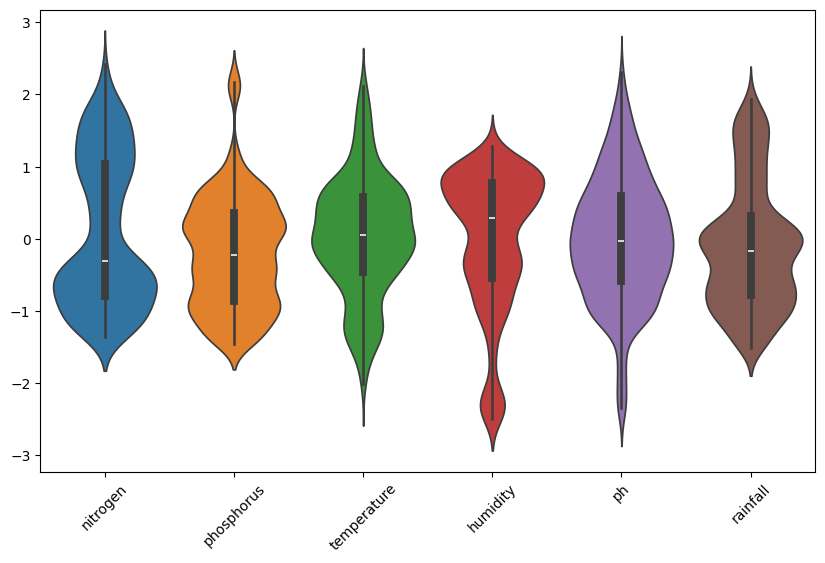

In [ ]:
#Eliminar columna target
df_d2= df_d1.drop(columns=['target'])

# Crear un gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_d2)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.show()

La grafica de violines permite realizar el siguiete analisis para cada variable:

- Para el nitrogeno la distribución es bimodal, con dos picos principales. Hay un rango de valores bastante amplio, con una densidad más alta cerca de los valores alrededor de -1 y 1.

- Phosphorus: Tiene una distribución más concentrada con un pico alto alrededor de 0. Los valores se agrupan más estrechamente en comparación con nitrogen.

- Temperature: Muestra una distribución casi simétrica y unimodal, con la mayor densidad alrededor de 0.

- Humidity: Presenta una distribución ligeramente bimodal, con dos picos cerca de 0 y algo de dispersión hacia valores negativos.

- ph: Similar a temperature, tiene una distribución más simétrica y unimodal con un pico en torno a 0.

- Rainfall: Muestra una distribución bimodal con dos picos a ambos lados de 0, indicando que los datos tienen dos densidades principales.

De forma general las variables nitrogen, humidity, y rainfall muestran distribuciones más complejas (bimodales o multimodales), sugiriendo que los datos pueden tener diferentes subgrupos o clústeres.
Las variables phosphorus, temperature, y ph tienen distribuciones más concentradas y unimodales, lo que indica que los datos están más centrados alrededor de un valor típico.

## **10. MODELOS DE REGRESIÓN**

In [ ]:
# Definir variable a a predecir
#y=df_d1.target

# Definir variables independientes para entrenar el modelo
#X=df_d1[['nitrogen','phosphorus','temperature','humidity','ph','rainfall']]

# 10.1 Regresion Lineal

## A) Visualizacion de distribucion de los datos de Ph

La grafica muestra la dispersion de los datos correspondiente al pH en relacion a los cultivos. El histograma en la parte superior muestra la distribución de la variable pH, que representa la variable independiente. El histograma en el lado derecho muestra la distribución de la variable target, que representa los cultivos, como variable independiente.

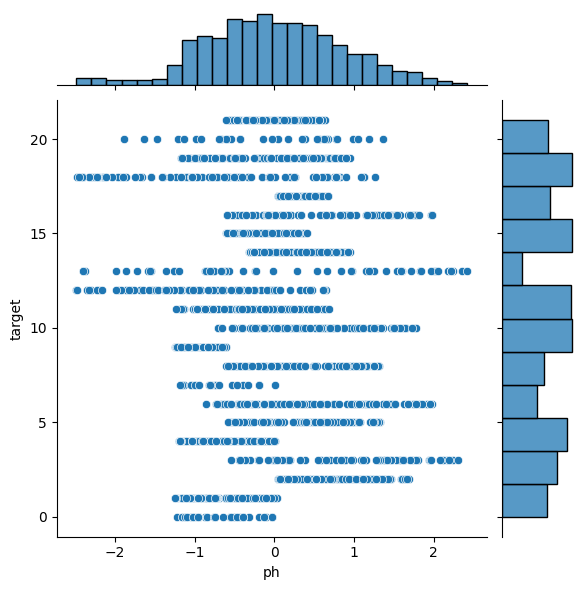

In [ ]:
sns.jointplot(x="ph", y="target", data=df_d1)

## B) Modelo de regresion lineal para el ph y metricas

La pendiente del modelo (B) es: [-0.4366958], el intersepto (A) es 10.611813187647416
Error cuadratico medio(MSE): 35.53050316726386
Raiz error cuadratico medio: 5.960746863209665
Coeficiente de determinacion (R^2): 0.007790104558172195


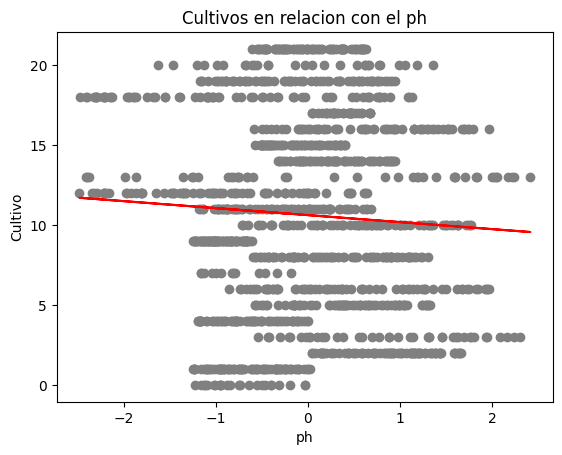

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# extrayendo la información del dataset
X = df_d1[["ph"]]
y = df_d1.target

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# crear el modelo
model = LinearRegression(fit_intercept = True)

# entrenarlo con los datos
model.fit(X_train, y_train)

# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {model.coef_}, el intersepto (A) es {model.intercept_}")

y_pred = model.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Cultivo')
plt.xlabel('ph')
plt.title('Cultivos en relacion con el ph')

# Realizar predicciones en el conjunto de datos
y_pred = model.predict(X_test)

# Calcular metricas de rendimiento
mse = mean_squared_error(y_test,y_pred)

rmse = mse**0.5

r2 = r2_score(y_test,y_pred)

print("Error cuadratico medio(MSE):",mse)
print("Raiz error cuadratico medio:",rmse)
print("Coeficiente de determinacion (R^2):",r2)

## C) Modelo de regresion lineal para el fosforo y metricas

La pendiente del modelo (B) es: [-3.63204236], el intersepto (A) es 9.938242168340729
Error cuadratico medio(MSE): 29.162456871074337
Raiz error cuadratico medio: 5.400227483270898
Coeficiente de determinacion (R^2): 0.2051558940006235


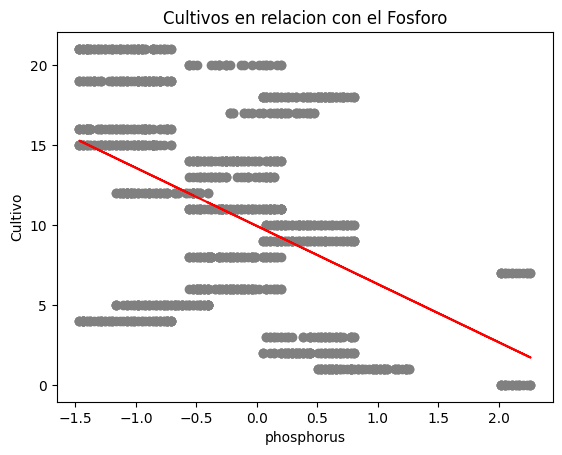

In [ ]:
# extrayendo la información del dataset
X = df_d1[["phosphorus"]]
y = df_d1.target

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# crear el modelo
model = LinearRegression(fit_intercept = True)

# entrenarlo con los datos
model.fit(X_train, y_train)

# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {model.coef_}, el intersepto (A) es {model.intercept_}")

y_pred = model.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Cultivo')
plt.xlabel('phosphorus')
plt.title('Cultivos en relacion con el Fosforo')

# Realizar predicciones en el conjunto de datos
y_pred = model.predict(X_test)

# Calcular metricas de rendimiento
mse = mean_squared_error(y_test,y_pred)

rmse = mse**0.5

r2 = r2_score(y_test,y_pred)

print("Error cuadratico medio(MSE):",mse)
print("Raiz error cuadratico medio:",rmse)
print("Coeficiente de determinacion (R^2):",r2)

## D) Modelo de regresion lineal para las precipitaciones y metricas

La pendiente del modelo (B) es: [-0.90598935], el intersepto (A) es 10.463727592946187
Error cuadratico medio(MSE): 35.48190583507367
Raiz error cuadratico medio: 5.956669021783371
Coeficiente de determinacion (R^2): 0.025853725116864013


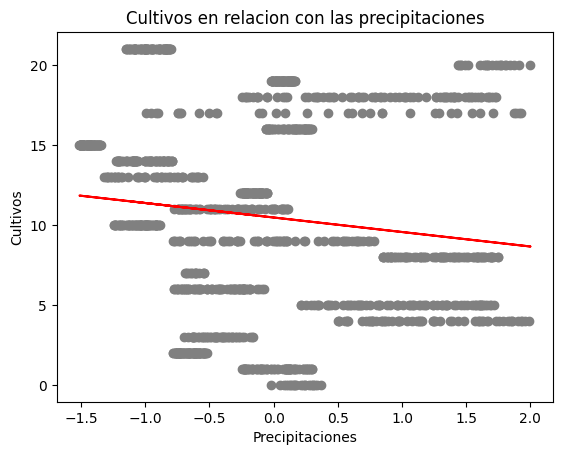

In [ ]:
# extrayendo la información del dataset
X = df_d1[["rainfall"]]
y = df_d1.target

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# crear el modelo
model = LinearRegression(fit_intercept = True)

# entrenarlo con los datos
model.fit(X_train, y_train)

# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {model.coef_}, el intersepto (A) es {model.intercept_}")

y_pred = model.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Cultivos')
plt.xlabel('Precipitaciones')
plt.title('Cultivos en relacion con las precipitaciones')

# Realizar predicciones en el conjunto de datos
y_pred = model.predict(X_test)

# Calcular metricas de rendimiento
mse = mean_squared_error(y_test,y_pred)

rmse = mse**0.5

r2 = r2_score(y_test,y_pred)

print("Error cuadratico medio(MSE):",mse)
print("Raiz error cuadratico medio:",rmse)
print("Coeficiente de determinacion (R^2):",r2)

## Conclusiones

- Por la forma en que se encuentran dispersos los puntos en las respectivas graficas de regresion lineal, se puede inferir que hay una escasa relacion entre las variables, debido probablemente a que la variable dependiente hace referencia a una categoria de cultivos, sin embargo, la dispersion de los puntos de cada una de las variables independientes pH, Fosforo y Precipitaciones en las respectivas graficas permite asociar un determinado grupo de datos o puntos a un cultivo.

- Lo anterior se confirma con el coeficiente de determinacion, que para todas las graficas de regresion lineal se obtiene un resultado proximo a cero (0), lo cual permite concuir que el modelo no explica la variabilidad de los datos ni permite realizar una prediccion confiable.

- La linea roja de regresion que atraviesa los puntos muestra una tendencia decreciente para todas las gráficas de regresión lineal.

- Se debe recurrir a otro modelo de predicción mas certero como el modelo de redes neuronales



# 10.2 Modelos de regresion multiple

Con el proposito de facilitar el modelado de regresion con dos variables o mas, se utiliza la funcion Principal Componentes Analysis (PCA), tecnica que permite reducir la dimensionalidad de las variables en el procesamiento de datos.

Resulta muy util porque ademas de reducir la dimensionalidad sin perder informacion, elimina la colinealidad entre variables independientes y mejora el rendimiento para facilitar la interpretabildad de los modelos

## A) Modelo de regresion con 2 variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Error cuadratico medio: 36.47333787459541
Coeficiente de determinacion R^2: 0.025818527129440882
Pendiente
[-0.9190462  -0.16288616]
Intercepto:
10.735879285194168


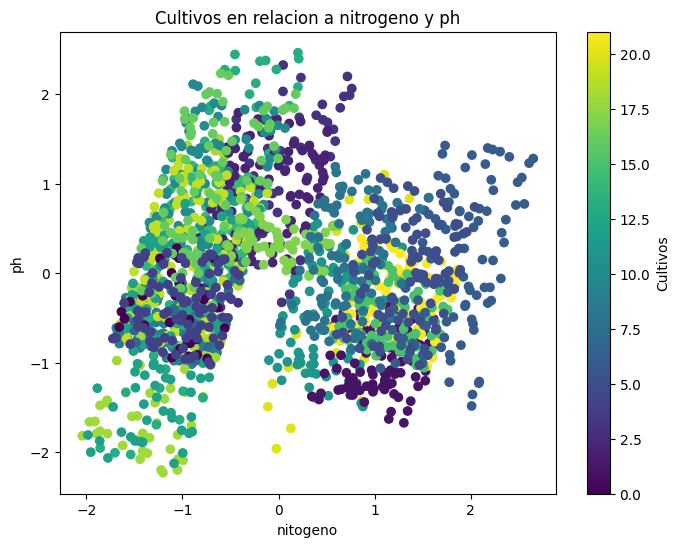

In [ ]:
#from sklearn.linear_model import LinearRegression

# seleccion de columnas
X_multiple = df_d1[["nitrogen","ph",]]

# Aplicamos PCA para reducir demensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_multiple)

# Definicion de y
y_multiple = df_d1["target"]

# Separacion de los datos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_multiple, test_size=0.2)

# Definicion de modelo de regresion lineal multiple
lr_multiple = LinearRegression()

# Entrenamiento del modelo
lr_multiple.fit(X_train, y_train)

# se realiza prediccion
Y_pred_multiple = lr_multiple.predict(X_test)

# calculo de error cuadratico medio
mse = mean_squared_error(y_test.values, Y_pred_multiple)

print("Error cuadratico medio:", mse)

# Calcular coeficiente de determinacion R^2
r2 = lr_multiple.score(X_test, y_test)

print("Coeficiente de determinacion R^2:", r2)

# Pendiente e intercepto
print("Pendiente")
print(lr_multiple.coef_)

print("Intercepto:")
print(lr_multiple.intercept_)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('nitogeno')
plt.ylabel('ph')
plt.title('Cultivos en relacion a nitrogeno y ph')
plt.colorbar(label='Cultivos')
plt.show()

Interpretacion:

Distribución de Puntos: Los puntos dispersos en la gráfica representan observaciones individuales o grupos de datos. Cada punto está codificado por colores que identifica el cultivo al que corresponde.

Los colores pueden variar desde azul oscuro, que identifica los valores mas bajos asociados a los cultivos de manzana, banano, arveja, coco, cafe, al que llamaremos grupo 1. Las coloraciones verdes se relacionan con los cultivos de uva, yute, lenteja, maiz, mango, frijol, grupo 2. Finalmente Los colores amarillo y verde claro identifican a los cultivos de melon, naranja, papaya, granada, arroz y sandia, que componen el grupo 3

Tendencias Observadas: valores cercanos a cero del ph y relativamente altos de nitrogeno favorecen a los cultivos del grupo 3., por su parte valores bajos de nitrogeno y de pH valores entre -2 y 2 se asocian con los cultivos del grupo 2. El grupo 1 se identifica con valores en pH entre -1 y 2, y con un nitrogeno que marque valores iguales e inferiores a 1.5.


## B) Modelo de regresion con 3 variables

Error cuadratico medio: 37.14990215896728
Coeficiente de determinacion R^2: 0.02566390614344949
Pendiente
[-1.08534804 -0.31668393]
Intercepto:
10.632760457320266


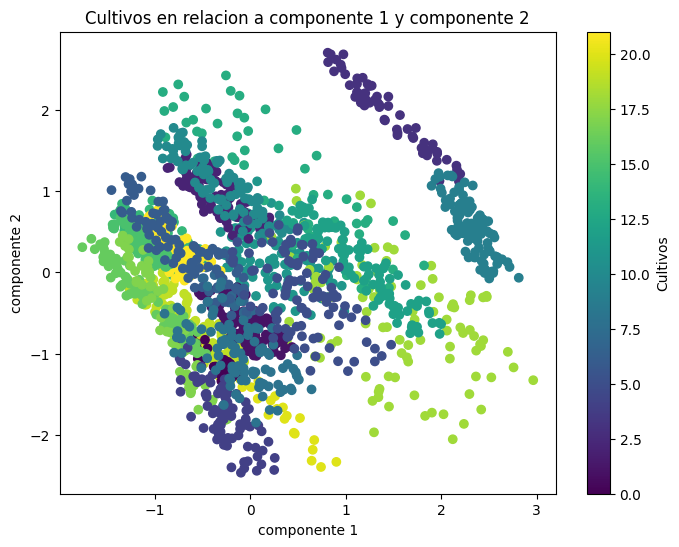

In [ ]:
# seleccion de columnas
X_multiple = df_d1[["ph", "humidity", "rainfall"]]

# Aplicamos PCA para reducir demensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_multiple)

# Definicion de y
y_multiple = df_d1["target"]

# Separacion de los datos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_multiple, test_size=0.2)

# Definicion de modelo de regresion lineal multiple
lr_multiple = LinearRegression()

# Entrenamiento del modelo
lr_multiple.fit(X_train, y_train)

# se realiza prediccion
Y_pred_multiple = lr_multiple.predict(X_test)

# calculo de error cuadratico medio
mse = mean_squared_error(y_test.values, Y_pred_multiple)

print("Error cuadratico medio:", mse)

# Calcular coeficiente de determinacion R^2
r2 = lr_multiple.score(X_test, y_test)

print("Coeficiente de determinacion R^2:", r2)

# Pendiente e intercepto
print("Pendiente")
print(lr_multiple.coef_)

print("Intercepto:")
print(lr_multiple.intercept_)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('Cultivos en relacion a componente 1 y componente 2')
plt.colorbar(label='Cultivos')
plt.show()

Interpretacion:

Ya se explicó que los puntos dispersos en la gráfica representan observaciones individuales de datos. Cada punto está codificado por colores que identifica el cultivo al que corresponde.

Los colores pueden variar desde azul oscuro, que identifica los valores mas bajos asociados a los cultivos de manzana, banano, arveja, coco, cafe, al que llamaremos grupo 1. Las coloraciones verdes se relacionan con los cultivos de uva, yute, lenteja, maiz, mango, frijol, grupo 2. Finalmente Los colores amarillo y verde claro identifican a los cultivos de melon, naranja, papaya, granada, arroz y sandia, que componen el grupo 3

Tendencias Observadas: valores inferiores a cero para el componente 2 y superiores a menos 1 para el componente 1 favorecen a los cultivos del grupo 3, por su parte valores superiores a menos 1 para el componente 2 y para el componente 1 valores superiores a 0 agrupan cultivos del grupo 1 y 2.

# **11. Modelos de Clasificacion**

## 11.1 Clasificacion KNN (K-Nearest Neighbor)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# Definir variable a a predecir
y=df_d1.target

# Definir variables independientes para entrenar el modelo
X=df_d1[['nitrogen','phosphorus','temperature','humidity','ph','rainfall']]

print(f"tam X: {X.shape}")
print(f"tam y: {y.shape}")

tam X: (1817, 6)
tam y: (1817,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(f"tam X: {X_train.shape}")
print(f"tam y: {y_train.shape}")
print(f"tam X_test: {X_test.shape}")
print(f"tam y_test: {y_test.shape}")

tam X: (1090, 6)
tam y: (1090,)
tam X_test: (727, 6)
tam y_test: (727,)


In [ ]:
# Entrenando el modelo
knn_clf.fit(X=X_train, y=y_train)

KNeighborsClassifier()

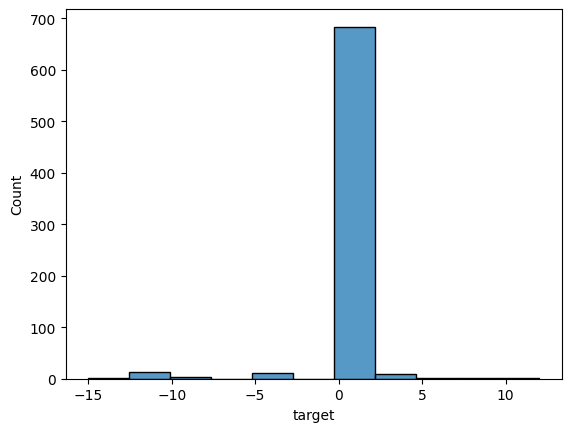

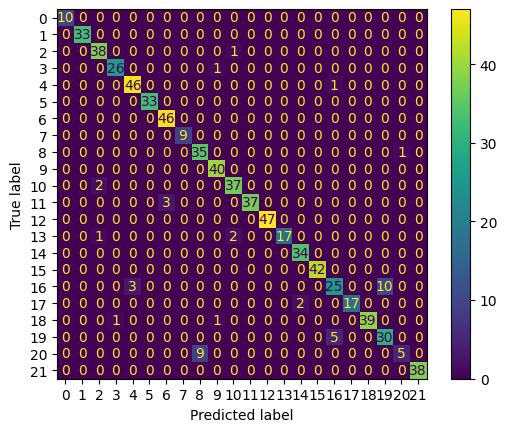

In [ ]:
#Evaluando el modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
predicciones = knn_clf.predict(X_test)
diferencias = predicciones - y_test
sns.histplot(diferencias)
cm = confusion_matrix(y_test, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.show()

De las graficas anteriores se puede concluir:

Para el histograma de diferencias, que visualiza los errores de prediccion, se puede observar que aunque hay algunas barras distantes del valor cero (0) en el eje "x", estas son casi imperceptibles ya que los valor que representan esta proximo a cero, por tanto se puede concluir que las predicciones son muy cercanas a los valores reales.

De otra parte la Matriz de confusion, que evalua el rendimiento del modelo, mostrando como se distribuyen las predicciones entre las diferentes clases, para este caso se puede observar en la diagonal principal valres que permiten inferir que las predicciones son correctas para la mayoria de los cultivos, expeto para dos cuyos valores estan proximos a 10, por lo tanto se puede concluir un buen rendimiento del modelo, ademas las predicciones incorrectas o por fuera del modelo, que demostrarian cierta confusion, son muy poco frecuentes.


In [ ]:
# Rerporte de clasificacion

from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        33
           2       0.93      0.97      0.95        39
           3       0.96      0.96      0.96        27
           4       0.94      0.98      0.96        47
           5       1.00      1.00      1.00        33
           6       0.94      1.00      0.97        46
           7       1.00      1.00      1.00         9
           8       0.80      0.97      0.88        36
           9       0.95      1.00      0.98        40
          10       0.93      0.95      0.94        39
          11       1.00      0.93      0.96        40
          12       1.00      1.00      1.00        47
          13       1.00      0.85      0.92        20
          14       0.94      1.00      0.97        34
          15       1.00      1.00      1.00        42
          16       0.81      0.66      0.72        38
          17       1.00    

Este reporte de clasificacion proporciona una vista detallada del rendimiento del modelo que se ha entrenado, el cual presenta para cada variable metricas como precisión, exhaustividad, que miden las instancias correctamente predichas como positivas sobre todas las instancias predichas como positivas y las realmente positivas respectivamente, finalmente está el puntaje o scoreF1, que representa la media armonica entre precisión y exahustividad.


Por los resultados de precision, el modelo es muy confiable, ya que ésta alcanza un porcentaje del 94% para la mayoria de los cultivos, ademas se presentaron 727 instancias verdaderas en el conjunto de datos.

El promedio de exahustividad o Recall 92% indica un alto porcentaje de instncias predichas correctamente como positivas sobre las realmente positivas. El F1-Score, que representa la media armonica de la precision y la exhaustividad refleja porcentajes del 93%

## 11.2 Clasificacion usando arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9669876203576341

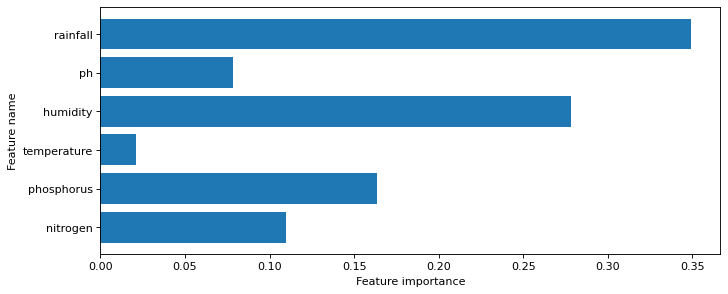

In [ ]:
# Visualizacion de las características de importacia que tienen en cuenta el árbol de decisión

plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

## 11.3 Modelo de red neuronal

Las Redes Neuronales Artificiales - RNA están compuestas por un conjunto de elementos simples (neuronas) que se interconectan masivamente en paralelo y con organización jerárquica. Asimismo, las redes neuronales artificiales conforman modelos que permiten describir muchos fenómenos del mundo real y que pueden ser comparados y aplicados con los modelos estadísticos en problemas de predicción, clasificación y agrupamiento.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (normalización)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir la red neuronal con Keras
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Realizar predicciones
predictions = model.predict(X_test)

# Mostrar las primeras predicciones
print(predictions[:5])

Epoch 1/100
117/117 [==============================] - 2s 6ms/step - loss: 90.9450 - val_loss: 33.1530
Epoch 2/100
117/117 [==============================] - 0s 3ms/step - loss: 25.3241 - val_loss: 25.1122
Epoch 3/100
117/117 [==============================] - 0s 4ms/step - loss: 21.3267 - val_loss: 22.7872
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 19.5443 - val_loss: 20.7765
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 17.9283 - val_loss: 18.8556
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 16.3579 - val_loss: 17.0804
Epoch 7/100
117/117 [==============================] - 0s 2ms/step - loss: 15.0856 - val_loss: 16.4573
Epoch 8/100
117/117 [==============================] - 0s 2ms/step - loss: 13.9888 - val_loss: 14.3439
Epoch 9/100
117/117 [==============================] - 0s 2ms/step - loss: 12.8485 - val_loss: 13.2774
Epoch 10/100
117/117 [==============================] - 0s 2ms/step - los

Error Cuadrático Medio (MSE): 3.835960865020752
Error Absoluto Medio (MAE): 1.3290079832077026
Coeficiente de Determinación (R²): 0.9003960438635767


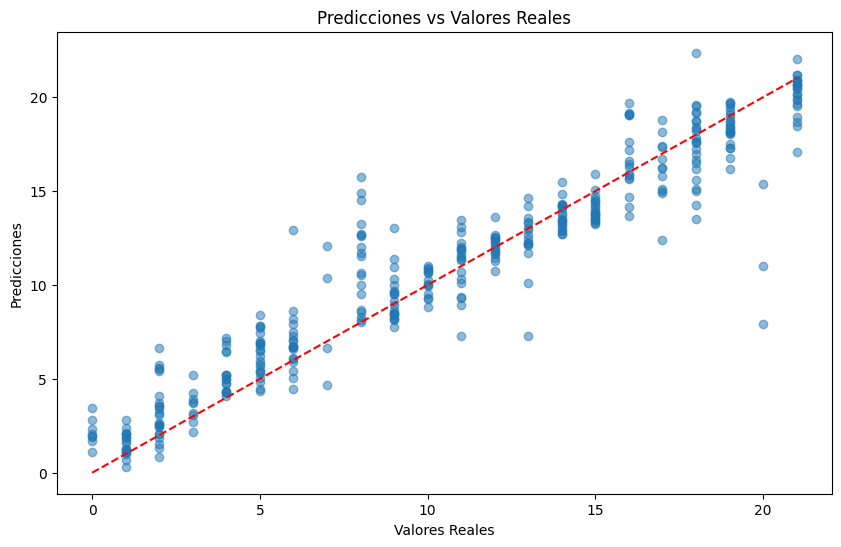

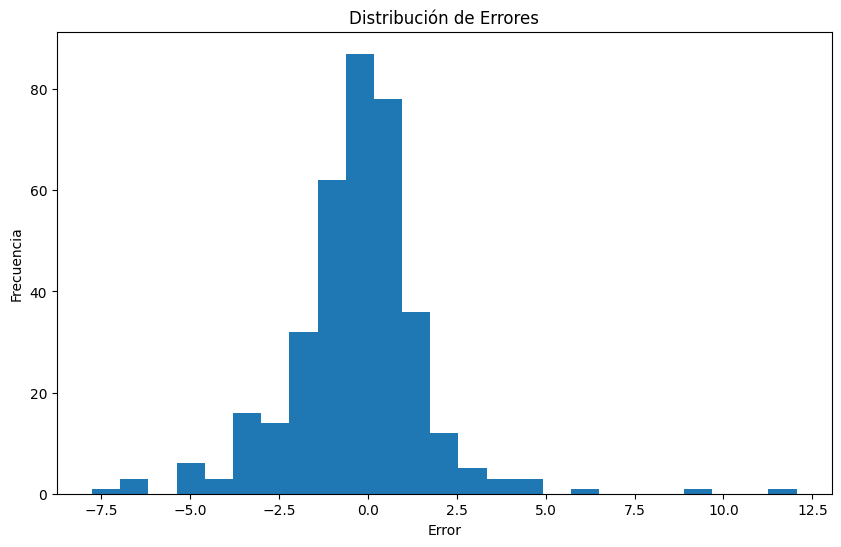

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Coeficiente de Determinación (R²): {r2}')

# Visualizar las predicciones versus los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Analizar los errores
errors = y_test - predictions.reshape(-1)
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.show()

El MAE de 1.32 significa que en promedio la diferencia absoluta entre las predicciones del modelo con respecto a los valores reales es de 1.32 unidades en la misma escala que la variable objetivo.

De otra parte el coeficiente de determinación  R^2 con valor de 0.90 indica que el modelo explica la variabilidad de los datos de la variable dependiente.

Para el histograma de distribucion de errores, que visualiza los errores de prediccion, se puede observar frecuencias cercanas al valor cero (0) en el eje "x", por tanto se puede concluir que las predicciones presentan algunos errres con respecto a los valores reales, pero son mínimos.


# **12. Clustering**

## 12.1 Reduccion de dimensionalidad UMAP

In [ ]:
!pip install umap
!pip install umap-learn

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=377c7195c34037193baa557dfe37ab83226786869343e2cd84a811b9585cb49a
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 877.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import umap

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS


import random
import time

std_figure_size = (8,5)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

fixed_random_state = random.seed(42)
n_parallel_jobs = -1

%config IPCompleter.use_jedi=False

In [ ]:
# Clustering
algos = ["K-means", "Mean shift", "Gaussian mixtures", "Affinity propagation", "DBSCAN", "OPTICS"]

# saving training times for each algo
training_times = []

In [ ]:
# Reduccion de dmensionalidad via UMAP

reducer = umap.UMAP(n_components=2, n_neighbors=25, n_jobs=n_parallel_jobs, random_state=fixed_random_state)
embedding = reducer.fit_transform(X)

X = pd.DataFrame(embedding, columns=["comp_1", "comp_2"])

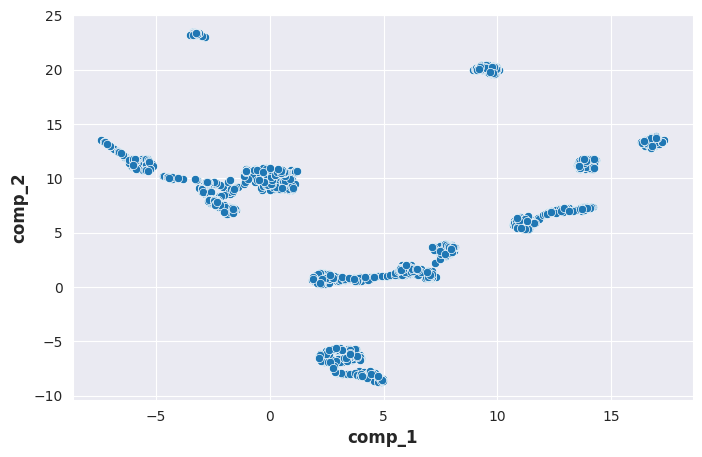

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(data= X, x="comp_1", y="comp_2")
plt.show()

In [ ]:
# Definicion de plot y funcion de convergencia

# function to visualize identified clusters

def visualize_clusters(*, df, labels_all, hyperparam_name, hyperparam_val, noise_exist):
    """Visualisation of identified clusters. Only a single hyperparameter is considered.

    Arguments
    =========
    df: pandas.DataFrame
        Dataframe of input features.
    labels_all: list | numpy.array
        Identified cluster IDs.
    hyperparam_name: str | None
        Name of hyperparameter.
    hyperparam_val: float | int | None
        Value of hyperparameter.
    noise_exist: bool
        True if algo models noise, False otherwise.
        Assumes encoding of noise as cluster ID = -1.

    Returns
    =======
    None
    Prints a figure.

    """

    # Checking of input parameters omitted for this notebook

    labels = sorted(pd.Series(labels_all).unique())

    if noise_exist:

        outlier_perc = int(round(( (len(df) - sum(np.where(labels_all == -1, False, True))) / len(df) ) * 100, 0))

        plt.figure(figsize=std_figure_size)
        for label in labels:
            if label == -1:
                marker_style = "*"
            else:
                marker_style = "o"
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label), marker=marker_style)
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}; 'Noise': {outlier_perc}%")
        else:
            plt.title(f"Defaults for all hyperparameters; 'Noise': {outlier_perc}%")
        plt.legend(title="cluster ID")
        plt.show()

    else:

        plt.figure(figsize=std_figure_size)
        for label in labels:
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label))
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}")
        else:
            plt.title(f"Defaults for all hyperparameters")
        plt.legend(title="cluster ID")
        plt.show()


def convergence_check(model):
    """Checking if fitted model converged within the max. number of iterations."""
    if model.n_iter_ < model.max_iter:
        print(f"Algorithm converged successfully!\nn_iter: {model.n_iter_}, max_iter: {model.max_iter}\n")
    else:
        print(f"WARNING: Algorithm did not converge within {model.max_iter} iterations!\n")

## 12.2 Logaritmo K-Means

In [ ]:
# K-means

# hyperparameter to tune

kmeans_hparam = "n_clusters"

In [ ]:
# Identificando el numero de cluster

inertias_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X)
    inertias_1.append(kmeans_1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

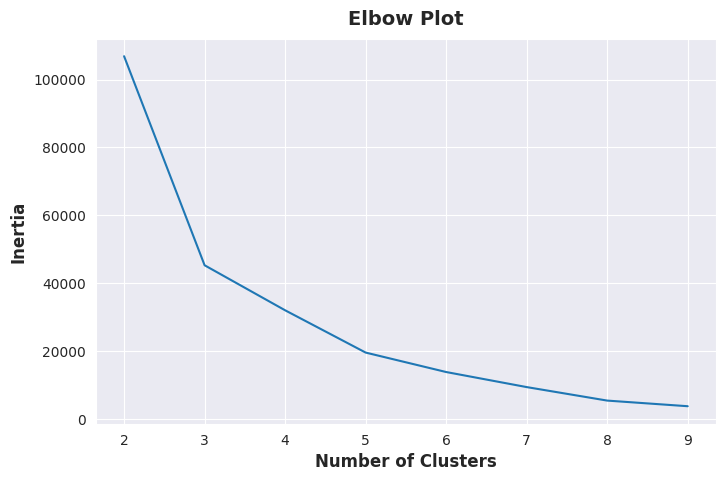

In [ ]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Cluster optimizados

%%time

start_time = time.time()

kmeans = KMeans(n_clusters=3, random_state=fixed_random_state)

labels_1 = kmeans.fit_predict(X)

convergence_check(kmeans)

training_times.append(time.time() - start_time)

Algorithm converged successfully!
n_iter: 6, max_iter: 300

CPU times: user 43.9 ms, sys: 577 µs, total: 44.5 ms
Wall time: 30 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


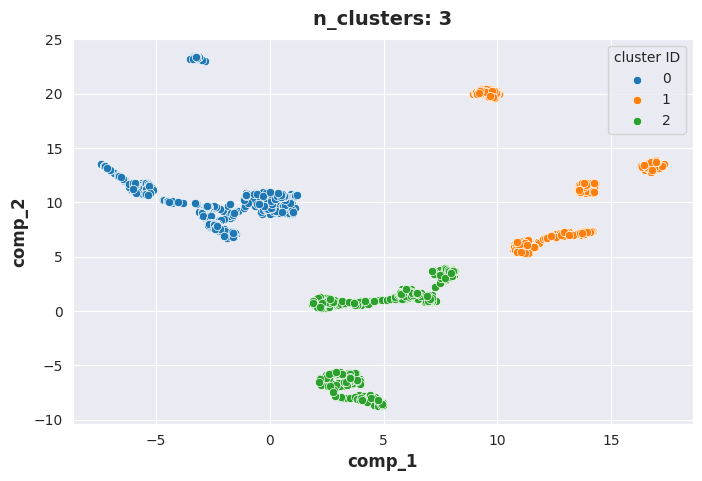

In [ ]:
visualize_clusters(df=X, labels_all=labels_1, hyperparam_name=kmeans_hparam, hyperparam_val=3, noise_exist=False)

Después de la reducción de dimensiones con la función UMAP a dos componentes y la identificación de tres clúster con la aplicación del método de codo, se continúa con el algoritmo K-means que agrupa observaciones similares para descubrir patrones a partir de centroides, generando como resultado la detección de tres clúster o conjuntos de datos con características similares, como se observa en la gráfica.

# **Conclusiones finales**

- A pesar de que el uso de modelos de regresión lineal y regresión múltiple no permiten realizar con exactitud una predicción de los cultivos debido a que no logran evidenciar una relación entre las variables dependiente e independientes, éstas se pueden ajustar mejor al modelo de regresión basado en redes neuronales, que registra un coeficiente de determinación de 0.92, valor que por su proximidad a 1 permite inferir que éste explica la relación entre las variables.

- De otra parte el método de clasificación KNN logró realizar predicciones muy válidas en relación al cultivo a partir de variables climáticas como la temperatura, humedad y precipitaciones y de otra parte variables propias del suelo como el pH y de macronutrientes principales como el Nitrógeno, Fósforo y Potasio.

- Finalmente en relación a los clúster identificados en el conjunto de datos aplicando el logaritmo K-means, se observan 3 conglomerados principales, después de que el método de codo identificara la presencia de 3 grupos de datos con carcterísticas similares.

## **Bibliografía**

[1] 	J. A. Rodrigo, Redes neuronales con Python, Madrid: https://cienciadedatos.net/documentos/py35-redes-neuronales-python.html , 2021.

[2] 	A. F. Jauregui, Cómo programar una red neuronal, -: https://anderfernandez.com/blog/como-programar-una-red-neuronal-desde-0-en-python/, 2022.

[3] 	Á. Gonzalo, Árboles de decisión en Python, -: https://machinelearningparatodos.com/arboles-de-decision-en-python/, 2023.

[4] 	J. A. Rodrigo, Árboles de decisión con Python: regresión y clasificación, -: https://cienciadedatos.net/documentos/py07_arboles_decision_python, 2020.

[5] 	J. I. Bagnato, Clasificar con K-Nearest-Neighbor ejemplo en Python, -: https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/, 2022.

[6] 	C. M. Ch., Modelos de regresión lineal con redes neuronales, Lima: https://dialnet.unirioja.es/descarga/articulo/7025156.pdf, 2013.



# **Futuros temas a trabajar**

- Custering con todos los algoritmos y su respectiva comparación
- Profundizar en redes neruronales y árboles de decisión